In [82]:
import dowhy
from dowhy import CausalModel
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [83]:
data=pd.read_csv('Final_Model_Data.csv')
print(data)

       DrugUse  MentalIllness  Age  EmploymentStatus  Sex  IncomeLevel  \
0            1              0    1                 1    1            1   
1            1              0    1                 1    1            1   
2            0              0    1                 1    0            1   
3            0              0    1                 1    1            1   
4            0              0    1                 0    0            1   
...        ...            ...  ...               ...  ...          ...   
25687        1              0    0                 0    0            1   
25688        0              1    1                 0    1            1   
25689        0              1    1                 1    1            1   
25690        1              1    1                 1    0            1   
25691        1              1    1                 0    0            1   

       UrbanRural  EducationLevel  
0               0               1  
1               1               1  
2  

In [84]:
data.head()

,DrugUse,MentalIllness,Age,EmploymentStatus,Sex,IncomeLevel,UrbanRural,EducationLevel
0,1,0,1,1,1,1,0,1
1,1,0,1,1,1,1,1,1
2,0,0,1,1,0,1,1,1
3,0,0,1,1,1,1,1,1
4,0,0,1,0,0,1,1,1


In [85]:
causal_graph = """strict digraph  {
Age;
EmploymentStatus;
IncomeLevel;
UrbanRural;
DrugUse;
MentalIllness;
Sex;
EducationLevel;
Age -> MentalIllness;
Age -> IncomeLevel;
Age -> EmploymentStatus;
IncomeLevel -> MentalIllness;
IncomeLevel -> DrugUse;
DrugUse -> MentalIllness;
EmploymentStatus -> IncomeLevel;
UrbanRural -> IncomeLevel;
EducationLevel ->EmploymentStatus;
Sex -> IncomeLevel;
Sex -> DrugUse;
UrbanRural -> EducationLevel;
}

"""

In [86]:
model=CausalModel(
        data = data,
        graph=causal_graph,
        treatment="DrugUse",
        outcome="MentalIllness")

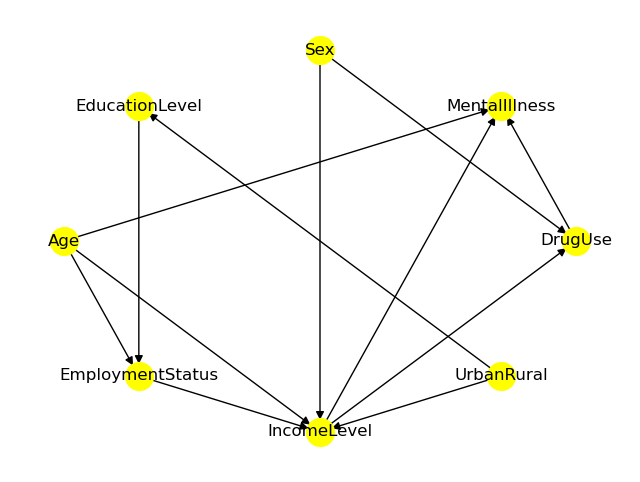

In [87]:
model.view_model()

In [88]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                       
──────────(E[MentalIllness|IncomeLevel,Sex])
d[DrugUse]                                  
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalIllness then P(MentalIllness|DrugUse,IncomeLevel,Sex,U) = P(MentalIllness|DrugUse,IncomeLevel,Sex)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [89]:
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

propensity_score_stratification
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                       
──────────(E[MentalIllness|IncomeLevel,Sex])
d[DrugUse]                                  
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalIllness then P(MentalIllness|DrugUse,IncomeLevel,Sex,U) = P(MentalIllness|DrugUse,IncomeLevel,Sex)

## Realized estimand
b: MentalIllness~DrugUse+IncomeLevel+Sex
Target units: atc

## Estimate
Mean value: 0.29558971407015067

Causal Estimate is 0.29558971407015067


/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [80]:
refutation = model.refute_estimate(identified_estimand, 
                                   causal_estimate_att,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

In [81]:
print(refutation)

Refute: Use a Placebo Treatment
Estimated effect:0.29558971407015067
New effect:-0.0023500858706275757
p value:0.3813616643350426



In [47]:
res_random=model.refute_estimate(identified_estimand,causal_estimate_att, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/gagangiri/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d

Refute: Add a random common cause
Estimated effect:0.2793753893328193
New effect:0.27918053732373027
p value:0.88



In [49]:
print(res_random)


Refute: Add a random common cause
Estimated effect:0.2793753893328193
New effect:0.27918053732373027
p value:0.88



In [71]:
causal_estimate_reg = model.estimate_effect(identified_estimand,
        method_name="backdoor.linear_regression",
        test_significance=True)
print(causal_estimate_reg)
print("Causal Estimate is " + str(causal_estimate_reg.value))


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
    d                                       
──────────(E[MentalIllness|IncomeLevel,Sex])
d[DrugUse]                                  
Estimand assumption 1, Unconfoundedness: If U→{DrugUse} and U→MentalIllness then P(MentalIllness|DrugUse,IncomeLevel,Sex,U) = P(MentalIllness|DrugUse,IncomeLevel,Sex)

## Realized estimand
b: MentalIllness~DrugUse+IncomeLevel+Sex
Target units: ate

## Estimate
Mean value: 0.2896709192171664
p-value: [0.]

Causal Estimate is 0.2896709192171664


In [51]:
refutations = model.refute_estimate(identified_estimand, 
                                   causal_estimate_reg,
                                   method_name="placebo_treatment_refuter",
                                   placebo_type="permute", num_simulations=20)

{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
{'control_value': 0, 'treatment_value': 1, 'test_significance': False, 'evaluate

In [52]:
print(refutations)

Refute: Use a Placebo Treatment
Estimated effect:0.27821906427639076
New effect:0.003797370843683512
p value:0.279845167828918

